In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
x_axis = np.linspace(-3,3)
y_axis = x_axis ** 2

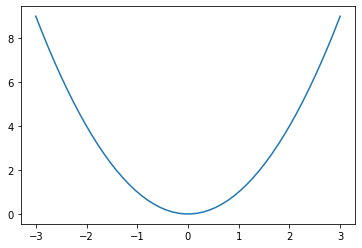

In [4]:
plt.plot(x_axis, y_axis)

In [5]:
import pandas as pd
df = pd.read_csv('qog_std_cs_jan18.csv')

In [6]:
df.shape

(194, 1882)

In [7]:
df.sample()

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
36,156,China,CHN,710.0,156.0,QoGStdCSJan18,NaN,NaN,28.0,14.0,...,1.664604,1.768935,1.512643,6.186435,6.849719,5.515307,3.867004,-0.333644,0.563769,0.631315


(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <BarContainer object of 10 artists>)

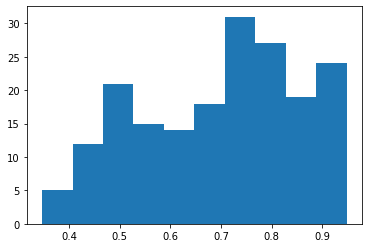

In [11]:
plt.hist(df['undp_hdi'])

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <BarContainer object of 10 artists>)

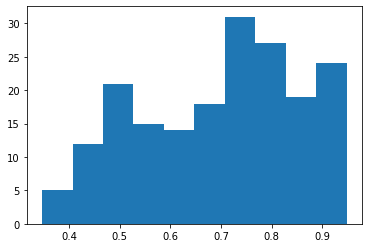

In [12]:
plt.hist(df['undp_hdi'].dropna())

In [13]:
df[df['undp_hdi'].isna()]['cname']

37               Taiwan
89         Korea, North
111              Monaco
119               Nauru
129    Marshall Islands
148          San Marino
159             Somalia
179              Tuvalu
Name: cname, dtype: object

In [15]:
df.shape

(194, 1882)

In [17]:
df.dropna().shape

(0, 1882)

In [18]:
hdi_dropna = df['undp_hdi'].dropna()

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <BarContainer object of 10 artists>)

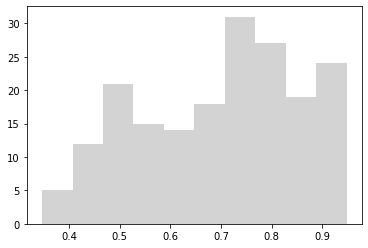

In [21]:
plt.hist(hdi_dropna, color = 'lightgrey')


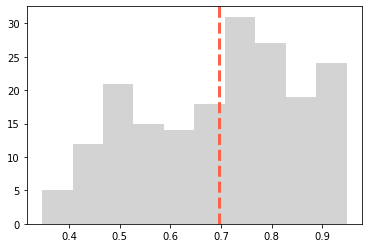

In [23]:
plt.hist(hdi_dropna, color = 'lightgrey')
plt.axvline(hdi_dropna.mean(), lw = 3, color = 'tomato', linestyle = '--')

Text(0, 0.5, 'Frecuencia')

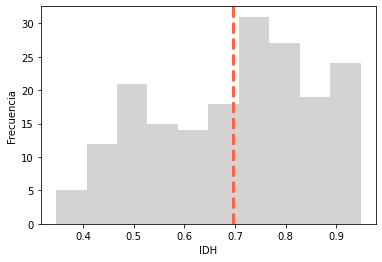

In [24]:
plt.hist(hdi_dropna, color = 'lightgrey')
plt.axvline(hdi_dropna.mean(), lw = 3, color = 'tomato', linestyle = '--')
plt.xlabel('IDH')
plt.ylabel('Frecuencia')

In [25]:
hdi_group = df.loc[:,['cname', 'ccode', 'undp_hdi', 'ht_region']]

In [26]:
hdi_group.head()

,cname,ccode,undp_hdi,ht_region
0,Afghanistan,4,0.479,8
1,Albania,8,0.762,1
2,Algeria,12,0.743,3
3,Andorra,20,0.857,5
4,Angola,24,0.531,4


In [29]:
hdi_group['region_recod'] = hdi_group['ht_region'].replace(
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem',
        'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean']

)

In [30]:
hdi_group.head()

,cname,ccode,undp_hdi,ht_region,region_recod
0,Afghanistan,4,0.479,8,SouthAsia
1,Albania,8,0.762,1,EastEurope
2,Algeria,12,0.743,3,NorthAfrica
3,Andorra,20,0.857,5,WesternDem
4,Angola,24,0.531,4,SubSaharian


In [31]:
hdi_group.groupby('region_recod')['undp_hdi'].mean()

region_recod
Caribbean        0.741154
EastAsia         0.817000
EastEurope       0.780679
LatAm            0.721500
NorthAfrica      0.748300
Pacific          0.643000
SouthAsia        0.605125
SouthEastAsia    0.695545
SubSaharian      0.508813
WesternDem       0.902360
Name: undp_hdi, dtype: float64

In [32]:
hdi_groupby_means = hdi_group.groupby('region_recod')['undp_hdi'].mean()

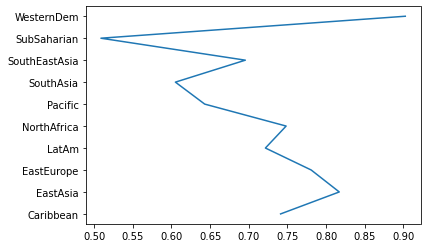

In [33]:
plt.plot(hdi_groupby_means.values, hdi_groupby_means.index)

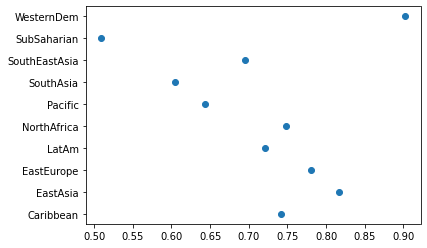

In [34]:
plt.plot(hdi_groupby_means.values, hdi_groupby_means.index, 'o')

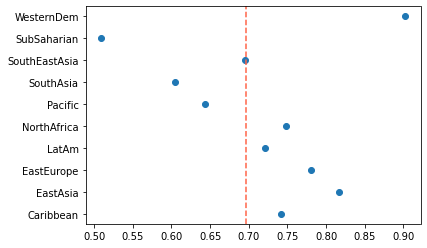

In [37]:
plt.plot(hdi_groupby_means.values, hdi_groupby_means.index, 'o')
plt.axvline(hdi_group['undp_hdi'].mean(), color = 'tomato', linestyle = '--')

In [38]:
mu = hdi_dropna.mean()
sigma = hdi_dropna.var()

In [39]:
print(f"La media del IDH es de {mu}, su varianza es de {sigma}")

La media del IDH es de 0.6958010768279573, su varianza es de 0.02411465796313718


**Simulando distribucion normal**

(array([  5.,  27.,  84., 177., 261., 209., 162.,  57.,  14.,   4.]),
 array([0.22246877, 0.32053578, 0.41860278, 0.51666979, 0.61473679,
        0.7128038 , 0.81087081, 0.90893781, 1.00700482, 1.10507182,
        1.20313883]),
 <BarContainer object of 10 artists>)

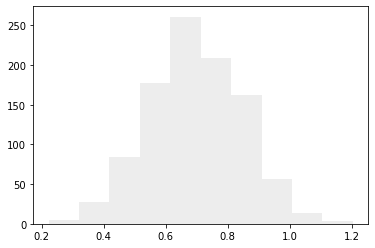

In [46]:
simulate_normal = np.random.normal(mu, np.sqrt(sigma), 1000)
plt.hist(simulate_normal, color='lightgrey', alpha = .4)

Colocando limites

(0.3, 1.0)

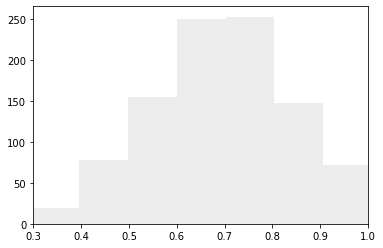

In [48]:
simulate_normal = np.random.normal(mu, np.sqrt(sigma), 1000)
plt.hist(simulate_normal, color='lightgrey', alpha = .4)
plt.xlim(.3, 1)

comportamiento empirico esperado

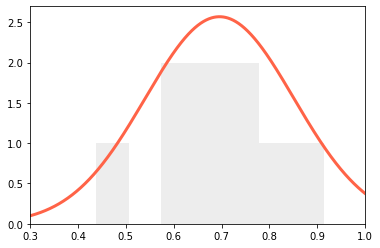

In [59]:
simulate_normal = np.random.normal(mu, np.sqrt(sigma), 10)
plt.hist(simulate_normal, color='lightgrey', alpha = .4)
plt.xlim(.3, 1)

from scipy.stats import norm
x_axis = np.linspace(.3, 1, 1000)
simulate_normal_pdf = norm.pdf(x_axis, mu, np.sqrt(sigma))
plt.plot(x_axis, simulate_normal_pdf, color = 'tomato', lw=3)

comportamiento verdadero

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <BarContainer object of 10 artists>)

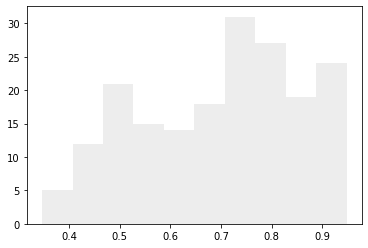

In [55]:
plt.hist(hdi_dropna, color = 'lightgrey', alpha = .4)


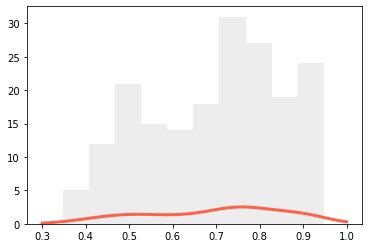

In [64]:
from scipy.stats import gaussian_kde
plt.hist(hdi_dropna, color = 'lightgrey', alpha=.4)
x_axis = np.linspace(.3, 1, 100)
gauss_norm = gaussian_kde(hdi_dropna)
z = np.reshape(gauss_norm(x_axis).T, x_axis.shape)
plt.plot(x_axis, z, color='tomato', lw=3)